# Benchmarks
### Run C++ benchmarks and store output in output.csv file for processing

In [7]:
import pandas as pd
import subprocess
import os

def filter_lines(file_path, keywords):
    filtered_lines = []
    with open(file_path, 'r') as file:
        for line in file:
            if not any(keyword in line for keyword in keywords):
                filtered_lines.append(line)
    return filtered_lines

c_output = subprocess.check_output("cd cpp && make run", shell=True)
c_output = c_output.decode("utf-8")
output_filename = 'cpp/output.csv'

with open(output_filename, 'w') as file:
    file.write(c_output)

# clean the csv file for processing
keywords = ['Running','csv', 'build', 'make', 'Building', 'executable', 'target']
filtered_lines = filter_lines(output_filename, keywords)
with open(output_filename, 'w') as file:
    for line in filtered_lines:
        file.write(line)

2023-06-29T09:55:38+01:00
Running ./build/bench1
Run on (12 X 2600 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x6)
  L1 Instruction 32 KiB (x6)
  L2 Unified 256 KiB (x6)
  L3 Unified 12288 KiB (x1)
Load Average: 0.81, 0.74, 0.87
***WARNING*** CPU scaling is enabled, the benchmark real time measurements may be noisy and will incur extra overhead.
2023-06-29T09:56:55+01:00
Running ./build/bench2
Run on (12 X 2600 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x6)
  L1 Instruction 32 KiB (x6)
  L2 Unified 256 KiB (x6)
  L3 Unified 12288 KiB (x1)
Load Average: 1.28, 0.93, 0.93
***WARNING*** CPU scaling is enabled, the benchmark real time measurements may be noisy and will incur extra overhead.
2023-06-29T10:02:47+01:00
Running ./build/bench3
Run on (12 X 2600 MHz CPU s)
CPU Caches:
  L1 Data 32 KiB (x6)
  L1 Instruction 32 KiB (x6)
  L2 Unified 256 KiB (x6)
  L3 Unified 12288 KiB (x1)
Load Average: 1.47, 1.25, 1.07
***WARNING*** CPU scaling is enabled, the benchmark real time measurements may be no

### Process C++ benchmarks output and create tables from it

In [5]:
import pandas as pd

output_filename = 'cpp/output.csv'
with open(output_filename, 'r') as file:
    lines = file.readlines()

# Split the lines based on the empty line separator
table_lines = []
current_table = []

for line in lines:
    if line.strip():
        current_table.append(line)
    elif current_table:
        table_lines.append(current_table)
        current_table = []
table_lines.append(current_table)
c_tables = []

for lines in table_lines:
    table = [line.strip().split(',') for line in lines]
    df = pd.DataFrame(table[1:], columns=table[0])
    columns_to_drop = ['bytes_per_second', 'items_per_second', 'label', 'error_occurred', 'error_message']
    df = df.drop(columns=columns_to_drop)
    c_tables.append(df)
print('C++ Benchmarks')
table_names = ["Implementation 1: build eertree and use it for a string of size n",
              "Implemenation 2: build eertree and use it for a string of size n",
               "Implemenation 1: number of rich strings of size n",
                "Implementation 2: number of rich strings of size n" ]
for idx, df in enumerate(c_tables):
    print(f"--- C++ Benchmarks ---")
    print(table_names[idx])

    table_style = df.style.set_properties(**{'text-align': 'center'})

# Define a color function to apply to the cells
    def color_cell(value):
        if value == "s" or "bench" in value:
            return 'color: green'
        if value.isdigit():
            return 'color: yellow'
        return 'color: white'

    table_style = table_style.applymap(color_cell)

    display(table_style)
    print()

C++ Benchmarks
--- C++ Benchmarks ---
Implementation 1: build eertree and use it for a string of size n


,name,iterations,real_time,cpu_time,time_unit
0,"""bench/10000/repeats:20_mean""",20,0.00260426,0.00260431,s
1,"""bench/10000/repeats:20_median""",20,0.0025986,0.00259869,s
2,"""bench/10000/repeats:20_stddev""",20,1.64199e-05,1.64284e-05,s
3,"""bench/10000/repeats:20_cv""",20,0.00031525,0.000315408,s
4,"""bench/20000/repeats:20_mean""",20,0.0135824,0.0135825,s
5,"""bench/20000/repeats:20_median""",20,0.0135474,0.0135474,s
6,"""bench/20000/repeats:20_stddev""",20,0.000121125,0.000121046,s
7,"""bench/20000/repeats:20_cv""",20,0.00044589,0.000445598,s
8,"""bench/40000/repeats:20_mean""",20,0.0499658,0.0499658,s
9,"""bench/40000/repeats:20_median""",20,0.0499635,0.0499635,s



--- C++ Benchmarks ---
Implemenation 2: build eertree and use it for a string of size n


,name,iterations,real_time,cpu_time,time_unit
0,"""bench/10000/repeats:100_mean""",100,0.00258858,0.00258845,s
1,"""bench/10000/repeats:100_median""",100,0.00258759,0.00258749,s
2,"""bench/10000/repeats:100_stddev""",100,2.51393e-05,2.51111e-05,s
3,"""bench/10000/repeats:100_cv""",100,9.7116e-05,9.70119e-05,s
4,"""bench/20000/repeats:100_mean""",100,0.00487468,0.00487444,s
5,"""bench/20000/repeats:100_median""",100,0.00488089,0.00488088,s
6,"""bench/20000/repeats:100_stddev""",100,4.66997e-05,4.67704e-05,s
7,"""bench/20000/repeats:100_cv""",100,9.58006e-05,9.59503e-05,s
8,"""bench/40000/repeats:100_mean""",100,0.00914426,0.00914385,s
9,"""bench/40000/repeats:100_median""",100,0.00913645,0.00913616,s



--- C++ Benchmarks ---
Implemenation 1: number of rich strings of size n


,name,iterations,real_time,cpu_time,time_unit
0,"""bench/2/repeats:5_mean""",5,0.000525952,0.000525953,s
1,"""bench/2/repeats:5_median""",5,0.000521999,0.000521992,s
2,"""bench/2/repeats:5_stddev""",5,6.07076e-06,6.0735e-06,s
3,"""bench/2/repeats:5_cv""",5,0.00230849,0.00230952,s
4,"""bench/4/repeats:5_mean""",5,0.00249482,0.00249476,s
5,"""bench/4/repeats:5_median""",5,0.00249325,0.00249312,s
6,"""bench/4/repeats:5_stddev""",5,4.34795e-06,4.35729e-06,s
7,"""bench/4/repeats:5_cv""",5,0.000348558,0.000349315,s
8,"""bench/6/repeats:5_mean""",5,0.00627901,0.00627889,s
9,"""bench/6/repeats:5_median""",5,0.00626321,0.00626316,s



--- C++ Benchmarks ---
Implementation 2: number of rich strings of size n


,name,iterations,real_time,cpu_time,time_unit
0,"""bench/2/repeats:5_mean""",5,1.14326e-05,1.14322e-05,s
1,"""bench/2/repeats:5_median""",5,1.14364e-05,1.14358e-05,s
2,"""bench/2/repeats:5_stddev""",5,5.65964e-08,5.62015e-08,s
3,"""bench/2/repeats:5_cv""",5,0.000990085,0.000983214,s
4,"""bench/4/repeats:5_mean""",5,8.05072e-05,8.05066e-05,s
5,"""bench/4/repeats:5_median""",5,8.05158e-05,8.05164e-05,s
6,"""bench/4/repeats:5_stddev""",5,4.09511e-08,4.27451e-08,s
7,"""bench/4/repeats:5_cv""",5,0.000101733,0.00010619,s
8,"""bench/6/repeats:5_mean""",5,0.000525617,0.000525521,s
9,"""bench/6/repeats:5_median""",5,0.000510973,0.000510964,s


### Run Haskell benchmarks and store output in output.txt file for processing

In [ ]:
output_filename = 'hs/output.txt'  
# This part has to be done manually for now... 
# Please run the command below manually, copy the output, and place it in output_filename
# with open(output_filename, 'w') as file:
#     subprocess.run('cd .. && stack bench', shell=True, check=True, stdout=file)

# Clean the ouput:
# keywords = ['FINISH','Completed', 'RUNNING...', 'Running']
keywords = ['Completed', 'Running']
filtered_lines = filter_lines(output_filename, keywords)
with open(output_filename, 'w') as file:
    for line in filtered_lines:
        file.write(line)

### Process haskell benchmarks output and create tables for it

In [25]:
import pandas as pd

with open('hs/output.txt', 'r') as file:
    lines = file.readlines()

haskell_dfs = []
current_benchmark = None
current_data = []

for line in lines:
    line = line.strip()
    
    # Check if it is a new benchmark
    if 'RUNNING...' in line:
        current_benchmark = line.split(' ')[-1]
    elif 'FINISH' in line :
        df = pd.DataFrame(current_data, columns=['Metric', current_benchmark])
        haskell_dfs.append(df)
        
        current_benchmark = None
        current_data = []
    elif line:
        metric, value = line.split(" ", 1)
        metric = metric.strip()
        value = value.strip()
        
        current_data.append([metric, value])
# Print the created dataframes
table_names = ['Simple', 'List', 'Node', 'Rich']
for idx, df in enumerate(haskell_dfs):
    print(f"--- haskell ---")
    print(table_names[idx])

    table_style = df.style.set_properties(**{'text-align': 'center'})
    display(table_style)
    print()


--- haskell ---
Simple


,Metric,RUNNING...
0,benchmarking,eertree @2/len 10000
1,time,158.9 ms (129.1 ms .. 197.5 ms)
2,0.957,R² (0.942 R² .. 0.998 R²)
3,mean,133.0 ms (122.0 ms .. 143.4 ms)
4,std,dev 18.62 ms (11.54 ms .. 29.82 ms)
5,variance,introduced by outliers: 48% (moderately inflated)
6,benchmarking,eertree @2/len 20000
7,time,279.6 ms (204.1 ms .. 327.0 ms)
8,0.965,R² (0.900 R² .. 1.000 R²)
9,mean,268.7 ms (251.1 ms .. 280.1 ms)



--- haskell ---
List


,Metric,RUNNING...
0,benchmarking,node @2/len 10
1,time,723.3 ns (718.5 ns .. 729.2 ns)
2,0.998,R² (0.997 R² .. 0.999 R²)
3,mean,742.8 ns (732.7 ns .. 762.3 ns)
4,std,dev 42.94 ns (22.91 ns .. 70.09 ns)
5,variance,introduced by outliers: 73% (severely inflated)
6,benchmarking,node @2/len 20
7,time,1.358 μs (1.344 μs .. 1.377 μs)
8,0.998,R² (0.997 R² .. 0.999 R²)
9,mean,1.386 μs (1.367 μs .. 1.404 μs)



--- haskell ---
Node


,Metric,RUNNING...
0,benchmarking,eertree @2/len 10000
1,time,157.3 ms (152.3 ms .. 162.1 ms)
2,0.999,R² (0.995 R² .. 1.000 R²)
3,mean,157.9 ms (155.6 ms .. 160.2 ms)
4,std,dev 3.447 ms (2.222 ms .. 4.958 ms)
5,variance,introduced by outliers: 12% (moderately inflated)
6,benchmarking,eertree @2/len 20000
7,time,322.7 ms (296.5 ms .. 344.0 ms)
8,0.996,R² (0.989 R² .. 1.000 R²)
9,mean,331.5 ms (321.4 ms .. 343.4 ms)



--- haskell ---
Rich


,Metric,RUNNING...
0,benchmarking,a216264/2
1,time,2.471 μs (2.167 μs .. 2.821 μs)
2,0.908,R² (0.877 R² .. 0.940 R²)
3,mean,2.609 μs (2.326 μs .. 2.850 μs)
4,std,dev 855.9 ns (753.6 ns .. 1.044 μs)
5,variance,introduced by outliers: 99% (severely inflated)
6,benchmarking,a216264/4
7,time,28.96 μs (26.00 μs .. 31.99 μs)
8,0.911,R² (0.869 R² .. 0.945 R²)
9,mean,32.56 μs (29.43 μs .. 35.28 μs)


### Gnerate graphs from benchmarks output:

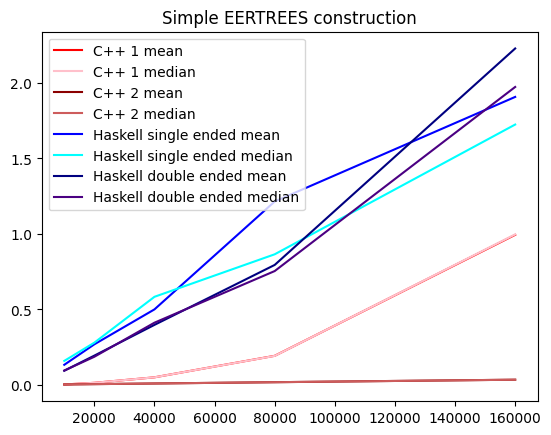

In [17]:
# Manual extraction of desired values
import matplotlib.pyplot as plt
import numpy as np
def second_conversion(str):
    if(str == "ns"):
        return 0.000000001
    if(str == "μs"):
        return 0.000001
    if(str == "ms"):
        return 0.001
    if(str == "cs"):
        return 0.01
    if(str == "s"):
        return 1.0
    print(f"UNKNOWN {str}")
    return 1.0

# create data
x = [10000, 20000, 40000, 80000, 160000]
y1, y2, y3, y4 = [], [], [], []
for index, row in c_tables[0].iterrows():
    if "mean" in row[0]:
        y1.append(float(row[2]))
for index, row in c_tables[0].iterrows():
    if "median" in row[0]:
        y2.append(float(row[2]))
for index, row in c_tables[1].iterrows():
    if "mean" in row[0]:
        y3.append(float(row[2]))
for index, row in c_tables[1].iterrows():
    if "median" in row[0]:
        y4.append(float(row[2]))
# plot lines
plt.plot(x, y1, label = "C++ 1 mean", color='red')
plt.plot(x, y2, label = "C++ 1 median", color='pink')
plt.plot(x, y3, label = "C++ 2 mean", color='darkred')
plt.plot(x, y4, label = "C++ 2 median", color='indianred')

y5, y6, y7, y8 = [], [], [], []
for index, row in haskell_dfs[0].iterrows():
    if "mean" in row[0]:
        y5.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )
    if(len(y5) == 5):
        break
for index, row in haskell_dfs[0].iterrows():
    if "time" in row[0]:
        y6.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )
    if(len(y6) == 5):
        break
for index, row in haskell_dfs[0].iterrows():
    if "mean" in row[0]:
        y7.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )
    if(len(y7) == 10):
        break
y7 = y7[5:]
for index, row in haskell_dfs[0].iterrows():
    if "time" in row[0]:
        y8.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )
    if(len(y8) == 10):
        break
y8 = y8[5:]
plt.plot(x, y5, label = "Haskell single ended mean", color='blue')
plt.plot(x, y6, label = "Haskell single ended median", color='cyan')
plt.plot(x, y7, label = "Haskell double ended mean", color='navy')
plt.plot(x, y8, label = "Haskell double ended median", color='indigo')
plt.legend()
plt.title('Simple EERTREES construction')
plt.show()

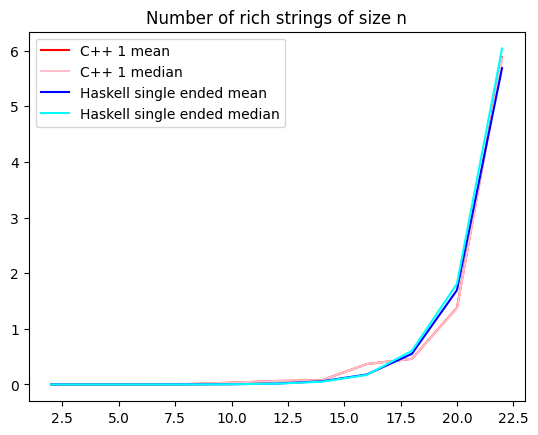

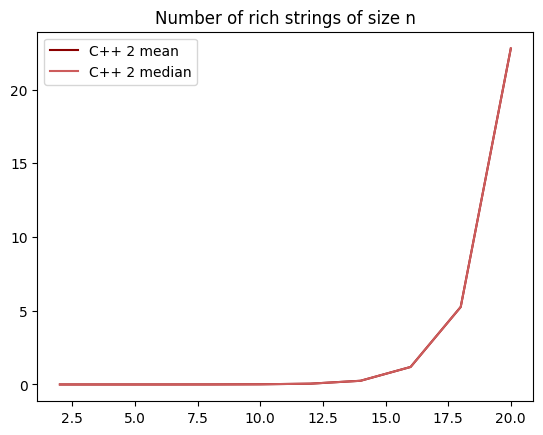

In [18]:
# Manual extraction of desired values
import matplotlib.pyplot as plt
import numpy as np
# create data
x = [2,4,6,8,10,12,14,16,18,20,22]
y1, y2 = [], []
for index, row in c_tables[2].iterrows():
    if "mean" in row[0]:
        y1.append(float(row[2]))
for index, row in c_tables[2].iterrows():
    if "median" in row[0]:
        y2.append(float(row[2]))

# plot lines
plt.plot(x, y1, label = "C++ 1 mean", color='red')
plt.plot(x, y2, label = "C++ 1 median", color='pink')


y5, y6 = [], []
for index, row in haskell_dfs[3].iterrows():
    if "mean" in row[0]:
        y5.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )

for index, row in haskell_dfs[3].iterrows():
    if "time" in row[0]:
        y6.append(float(row[1].split(' ')[0]) * second_conversion(row[1].split(' ')[1]) )

plt.plot(x, y5, label = "Haskell single ended mean", color='blue')
plt.plot(x, y6, label = "Haskell single ended median", color='cyan')

plt.legend()
plt.title('Number of rich strings of size n')
plt.show()

x = [2,4,6,8,10,12,14,16,18,20]
y3, y4 = [], []
for index, row in c_tables[3].iterrows():
    if "mean" in row[0]:
        y3.append(float(row[2]))
for index, row in c_tables[3].iterrows():
    if "median" in row[0]:
        y4.append(float(row[2]))
plt.plot(x, y3, label = "C++ 2 mean", color='darkred')
plt.plot(x, y4, label = "C++ 2 median", color='indianred')
plt.legend()
plt.title('Number of rich strings of size n')
plt.show()